# 单个主成分分析python实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 生成随机数据

随机生成100个坐标点，横坐标为0-100的一个均匀分布，纵坐标为其一个线性变换增加少量干扰因素

In [2]:
data = np.empty((100, 2))
data[:, 0] = np.random.uniform(0., 100., size=100)
data[:, 1] = 0.75 * data[:, 0] + 3 + np.random.normal(0, 10., size=100)

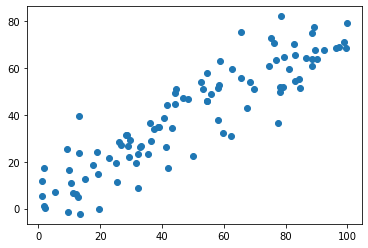

In [3]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## 定义工具函数
在实现时，需要将数据均值化为0，也就是像$X'=X-\overline{X}$，并且定义寻找方向向量的函数，寻找方向向量可以通过将向量除以它的二阶范式得到


In [4]:
def demean(X):
    return X - np.mean(X)


def direction(w):
    return w / np.linalg.norm(w)


## 实现PCA

### 设置超参数
设置梯度下降的学习率

In [5]:
# 学习率
lr = 0.01

### 获取映射坐标轴的标准差
PCA的本质是把数据映射在某个向量上，这里需要求标准差来反应主成分选择的正确性，标准差越大说明选择的越正确。

假设主成分方向向量为$w$，数据样本为$X$，则标准差为$\sqrt{\frac{1}{m}(X\cdot w)^2}$

In [6]:
def mapping_standard_deviation(X, w):
    dist = X.dot(w.transpose()) ** 2
    sqr = np.sqrt(dist.sum() / X.shape[0])
    return sqr

### 当前梯度计算
根据之前推导的公式，计算梯度
$$
\frac{\partial f}{\partial \bf{u}}=\frac{2}{m}X'^T(X'u)
$$

In [7]:
def grad_calculate(X, w):
    grad = X.transpose().dot(X.dot(w)) * 2. / X.shape[0]
    return grad


### 梯度下降
输入样本数据，并执行若干个epoch的梯度下降操作。

*注意：这里每次修改完w，它可能变成非单位向量，这里需要转化*

In [8]:
def get_pca(X):
    dem_X = demean(X)
    w = np.full(2, 1., dtype=float)
    w = direction(w)
    history_var = []

    epoch = 50
    for _ in range(epoch):
        loss = mapping_standard_deviation(dem_X, w)
        w_grad = grad_calculate(dem_X, w)
        w += w_grad * lr
        w = direction(w)
        history_var.append(loss)
    return w, history_var

## 分析数据PCA
执行封装好的方法

In [9]:
pca_w, history = get_pca(data)

### 生成基向量
将数据映射到基向量上，可使方差差最大，输出所有被映射后的点

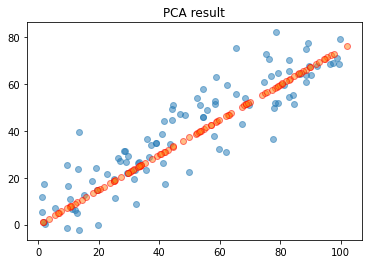

In [11]:
project_dist = data.dot(pca_w)
projected_point = project_dist.reshape(100, 1).dot(pca_w.reshape(1, -1))
#projected_point = project_dist * w
plt.title('PCA result')
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.scatter(projected_point[:, 0], projected_point[:, 1], edgecolors='red', alpha=0.5)
plt.show()

In [12]:
# 基向量
pca_w

array([0.80068358, 0.59908748])

### 检查标准差变化曲线
预期结果为方差逐渐变大并收敛

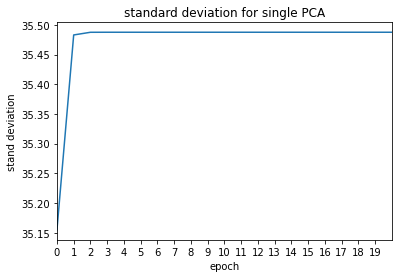

In [13]:
plt.title('standard deviation for single PCA')
plt.xlabel("epoch")
plt.xlim([0, 20])
plt.xticks(np.arange(20))
plt.ylabel("stand deviation")
plt.plot(np.arange(len(history)), history)
plt.savefig('./single PCA standard deviation.jpg')
plt.show()

### 高维数据降维

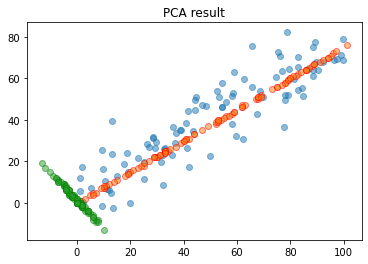

In [14]:
project_dist = np.dot(data, pca_w)
projected_point = np.full(data.shape, 0)
projected_remain = np.full(data.shape, 0)
for i in range(len(data)):
    projected_point[i] = data[i].dot(pca_w) * pca_w
    projected_remain[i] = data[i] - projected_point[i]
plt.title('PCA result')
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.scatter(projected_point[:, 0], projected_point[:, 1], edgecolors='red', alpha=0.5)
plt.scatter(projected_remain[:, 0], projected_remain[:, 1], edgecolors='green', alpha=0.5)
plt.show()